## Session 3: Pandas
In this session, we will use python's pandas library to read, clean, summarize and plot data.

In [28]:
import numpy as np
import pandas as pd

In [29]:
# Set path to education outcomes dataset

path = r'https://raw.githubusercontent.com/worldbank/Python-for-Data-Science/master/June_2021_ETEC/day_2/data/data_edu.csv'

In [30]:
# Read data from csv file into dataframe

df = pd.read_csv(path, encoding = 'utf_8')

#### 1. Data Exploration

In [31]:
# Check dataframe shape: (# of observations, # of columns)

df.shape

(50397, 18)

In [32]:
# Inspect the first two rows of dataframe

df.head(2) # df.tail(2) for last two observations

,country_id,country,country_school_id,country_student_id,student_gender,computer_at_home,internet_at_home,immigration_status,early_education,repeated_grades,school_location,school_type,school_size,class_size,socioeconomic_index,math_score,reading_score,parent_education
0,Argentina,Argentina,3200001,3213049,Female,No,Yes,First-Generation,Attended ECEC for at least two but less than t...,Repeated a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-1.3730,314.25031,424.07239,"Post secondary, non-tertiary"
1,Argentina,Argentina,3200001,3203374,Female,Yes,Yes,Native,Attended ECEC for at least two but less than t...,Did not repeat a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-1.1825,356.07629,380.26309,"Post secondary, non-tertiary"


In [33]:
# Inspect dataframe columns

df.columns

Index(['country_id', 'country', 'country_school_id', 'country_student_id',
       'student_gender', 'computer_at_home', 'internet_at_home',
       'immigration_status', 'early_education', 'repeated_grades',
       'school_location', 'school_type', 'school_size', 'class_size',
       'socioeconomic_index', 'math_score', 'reading_score',
       'parent_education'],
      dtype='object')

In [34]:
# Get a quick overview of the dataframe (columns, missing values, data types)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50397 entries, 0 to 50396
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_id           50397 non-null  object 
 1   country              50397 non-null  object 
 2   country_school_id    50397 non-null  int64  
 3   country_student_id   50397 non-null  int64  
 4   student_gender       50397 non-null  object 
 5   computer_at_home     49965 non-null  object 
 6   internet_at_home     49965 non-null  object 
 7   immigration_status   50397 non-null  object 
 8   early_education      50397 non-null  object 
 9   repeated_grades      50397 non-null  object 
 10  school_location      49511 non-null  object 
 11  school_type          50397 non-null  object 
 12  school_size          50397 non-null  object 
 13  class_size           49395 non-null  object 
 14  socioeconomic_index  49564 non-null  float64
 15  math_score           50397 non-null 

In [35]:
# Filter dataframe by relevant columns

list_of_relevant_columns = ["country", "school_type", "reading_score", "math_score"]

df[list_of_relevant_columns]

,country,school_type,reading_score,math_score
0,Argentina,Public,424.07239,314.25031
1,Argentina,Public,380.26309,356.07629
2,Argentina,Public,384.89191,338.08029
3,Argentina,Public,392.88031,310.38690
4,Argentina,Public,452.03439,397.42441
...,...,...,...,...
50392,United States,Public,571.73859,543.91510
50393,United States,Public,632.34979,517.25360
50394,United States,Public,638.23328,579.05408
50395,United States,Public,339.23511,302.05261


In [36]:
# Use square bracket notation to inspect a column 

df["math_score"].tail()

50392    543.91510
50393    517.25360
50394    579.05408
50395    302.05261
50396    525.31409
Name: math_score, dtype: float64

In [37]:
# Alternate method: using dot notation:

df.math_score.tail()

50392    543.91510
50393    517.25360
50394    579.05408
50395    302.05261
50396    525.31409
Name: math_score, dtype: float64

In [38]:
# # Summarize select columns: 

df.math_score.mean()

469.53370103240275

In [39]:
# For a more detailed summary: 

df.math_score.describe()

count    50397.000000
mean       469.533701
std         96.473981
min        128.113910
25%        399.351590
50%        470.627810
75%        540.987120
max        797.783020
Name: math_score, dtype: float64

In [40]:
# Select a subset of the dataframe: i.e. values where a conditional statement is True

df[df.math_score>500].shape

(19692, 18)

In [41]:
# Similarly

df[df.math_score<=500].shape

(30705, 18)

In [42]:
# Together, the two subsets above make up the original dataframe

df.shape

(50397, 18)

In [43]:
# We can also use conditions to create new dataframes
# For example, if we want to look at data from a single country: 

df_japan = df[df.country=="Japan"]
df_japan.shape

(6109, 18)

In [44]:
# Check the unique number of values in a column (good for categorical data)

df.country.nunique()

8

In [45]:
# Check what those unique values are: 

df.country.unique()

array(['Argentina', 'Finland', 'Japan', 'Netherlands', 'New Zealand',
       'Norway', 'Romania', 'United States'], dtype=object)

In [46]:
# Useful for categorical variables:

# .value_counts() return a Series containing unique values as its index and
# frequencies as its values, in descending order.

df.repeated_grades.value_counts()

Did not repeat a  grade    32399
No Response                13513
Repeated a  grade           4485
Name: repeated_grades, dtype: int64

In [47]:
# Alternatively, to get the breakdown in percentages: 

df.repeated_grades.value_counts(normalize = True)

Did not repeat a  grade    0.642876
No Response                0.268131
Repeated a  grade          0.088993
Name: repeated_grades, dtype: float64

In [48]:
# How are observations are distributed across country and student_gender?

pd.crosstab(df.country, df.student_gender)

student_gender,Female,Male
country,,
Argentina,6232,5743
Finland,2772,2877
Japan,3120,2989
Netherlands,2330,2435
New Zealand,3154,3019
Norway,2880,2933
Romania,2444,2631
United States,2376,2462


In [49]:
# To get crosstab in percentages, with totals under "All"

pd.crosstab(df.country, df.student_gender, normalize=True, margins = True)

student_gender,Female,Male,All
country,,,
Argentina,0.123658,0.113955,0.237613
Finland,0.055003,0.057087,0.112090
Japan,0.061908,0.059309,0.121218
Netherlands,0.046233,0.048316,0.094549
New Zealand,0.062583,0.059904,0.122487
Norway,0.057146,0.058198,0.115344
Romania,0.048495,0.052205,0.100700
United States,0.047146,0.048852,0.095998
All,0.502173,0.497827,1.000000


#### 2. Visualization: Call matplotlib from pandas

MatPlotLib is a widely used plotting library. You can pass it data directly, either for data exploration purposes or to produce publication quality outputs. 

DataFrames have a helpful set of methods which call MatPlotLib directly.

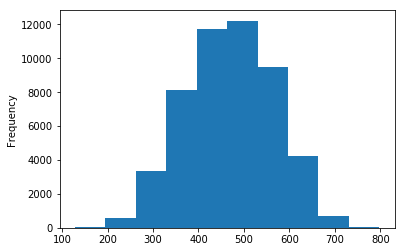

In [50]:
# Histogram: Examine how math scores are distributed

df.math_score.plot(kind="hist")

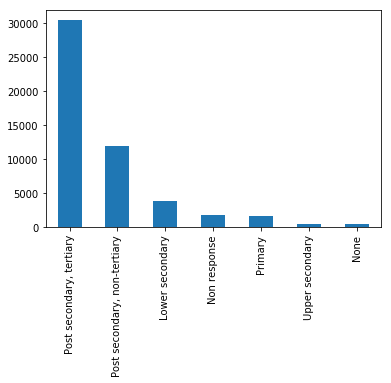

In [51]:
# Bar graph: for levels of parent education

df.parent_education.value_counts().plot(kind = 'bar')

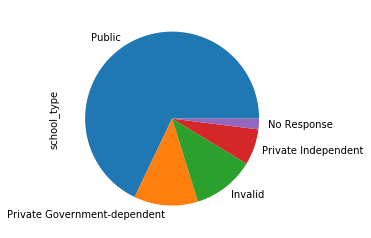

In [52]:
# Pie chart: for school_type

df.school_type.value_counts().plot(kind = 'pie')

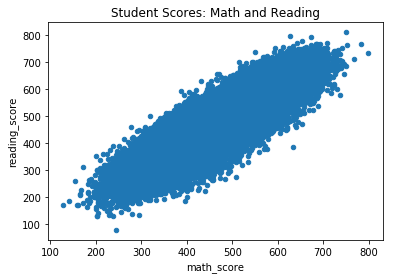

In [53]:
# Scatterplot: Math score vs Reading score

df.plot(x = 'math_score', y = 'reading_score', kind = 'scatter', title = 'Student Scores: Math and Reading')